In [1]:
#import the libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.metrics import RootMeanSquaredError
from keras.losses import MeanSquaredError
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
#import data
df = %store -r weather
df = weather
df

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),Avg Temp
0,2019-01-07,2.5,18.1,0.0,W,15.0,0:33,6.1,77.0,WNW,2,17.6,27.0,NNE,4,10.30
1,2019-02-07,3.2,22.4,0.0,NNW,31.0,14:16,7.7,68.0,NW,6,20.0,35.0,NNW,19,12.80
2,2019-03-07,6.3,17.4,0.0,S,24.0,13:52,12.4,53.0,SSW,4,14.6,84.0,S,15,11.85
3,2019-04-07,11.7,15.8,1.8,SE,30.0,13:21,13.7,81.0,SSW,15,14.4,88.0,SSE,15,13.75
4,2019-05-07,11.6,18.1,1.2,ESE,41.0,14:33,13.6,84.0,S,4,16.5,72.0,ESE,24,14.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2020-07-27,11.9,17.2,49.4,NW,50.0,1:43,14.2,84.0,NW,17,14.2,94.0,WNW,11,14.55
393,2020-07-28,10.0,14.1,17.4,NW,41.0,12:25,11.1,98.0,NW,20,13.1,92.0,NW,22,12.05
394,2020-07-29,9.0,19.4,4.0,S,20.0,12:19,12.2,99.0,WNW,4,18.7,53.0,W,4,14.20
395,2020-07-30,8.0,18.6,0.0,S,28.0,12:18,11.2,83.0,W,11,16.1,51.0,S,7,13.30


In [3]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Date']

0     2019-01-07
1     2019-02-07
2     2019-03-07
3     2019-04-07
4     2019-05-07
         ...    
392   2020-07-27
393   2020-07-28
394   2020-07-29
395   2020-07-30
396   2020-07-31
Name: Date, Length: 396, dtype: datetime64[ns]

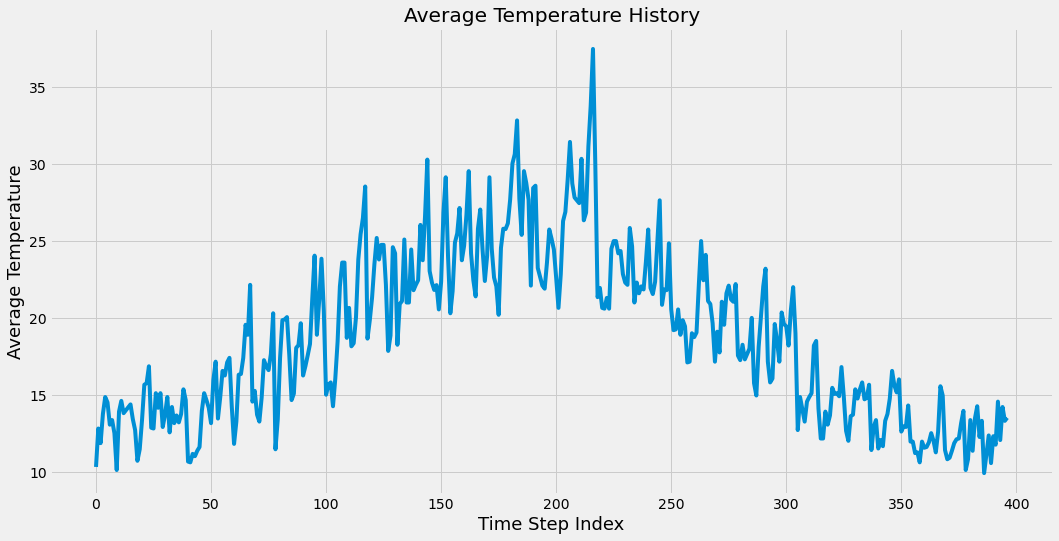

In [4]:
plt.figure(figsize = (16,8))
plt.title('Average Temperature History')
plt.plot(df['Avg Temp'])
plt.xlabel('Time Step Index', fontsize=18)
plt.ylabel('Average Temperature', fontsize = 18)
plt.show()

In [5]:
#Create new dataframe
temp = df.filter(['Avg Temp'])
#Convert to np array
np_temp = temp.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(np_temp) * .8)

training_data_len

317

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np_temp)

scaled_data

array([[-1.54865914e+00],
       [-1.08686365e+00],
       [-1.26234594e+00],
       [-9.11381371e-01],
       [-7.08191359e-01],
       [-7.72842727e-01],
       [-1.04068411e+00],
       [-9.85268648e-01],
       [-1.14227911e+00],
       [-1.58560277e+00],
       [-8.83673642e-01],
       [-7.54370907e-01],
       [-9.02145462e-01],
       [-8.67049005e-01],
       [-8.31952548e-01],
       [-7.96856092e-01],
       [-9.74185557e-01],
       [-1.10533547e+00],
       [-1.47477186e+00],
       [-1.33623321e+00],
       [-9.85268648e-01],
       [-5.60416805e-01],
       [-5.41944986e-01],
       [-3.38754974e-01],
       [-1.07762774e+00],
       [-1.08686365e+00],
       [-6.62011811e-01],
       [-8.37494094e-01],
       [-6.62011811e-01],
       [-1.06839184e+00],
       [-9.20617281e-01],
       [-7.08191359e-01],
       [-1.13304320e+00],
       [-8.28258185e-01],
       [-1.02221229e+00],
       [-9.29853191e-01],
       [-1.01297638e+00],
       [-9.11381371e-01],
       [-6.1

In [8]:
#Create training dataset
#Create scaled training set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        

[array([-1.54865914, -1.08686365, -1.26234594, -0.91138137, -0.70819136,
       -0.77284273, -1.04068411, -0.98526865, -1.14227911, -1.58560277,
       -0.88367364, -0.75437091, -0.90214546, -0.867049  , -0.83195255,
       -0.79685609, -0.97418556, -1.10533547, -1.47477186, -1.33623321,
       -0.98526865, -0.5604168 , -0.54194499, -0.33875497, -1.07762774,
       -1.08686365, -0.66201181, -0.83749409, -0.66201181, -1.06839184,
       -0.92061728, -0.70819136, -1.1330432 , -0.82825818, -1.02221229,
       -0.92985319, -1.01297638, -0.91138137, -0.61583226, -0.745135  ,
       -1.48400777, -1.49324368, -1.39164867, -1.4193564 , -1.35470503,
       -1.30852549, -0.87443773, -0.66201181, -0.745135  , -0.83749409,
       -1.02221229, -0.50500135, -0.28333952, -0.96679683, -0.70819136,
       -0.39417043, -0.44958589, -0.29257543, -0.23715997, -0.81902227])]
[-1.2715818471986906]

[array([-1.54865914, -1.08686365, -1.26234594, -0.91138137, -0.70819136,
       -0.77284273, -1.04068411, -0.9

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((257, 60), (257,))

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(257, 60, 1)

In [36]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25, activation='swish'))
model.add(Dense(1))

In [37]:
#Compile the model
model.compile(optimizer='adam', loss = MeanSquaredError(), metrics = [RootMeanSquaredError()])

In [38]:
#Train the model
history = model.fit(x_train, y_train, batch_size = 75, epochs = 5, validation_split=0.2, shuffle = True)

Epoch 1/5
3/3 [==============================] - 6s 600ms/step - loss: 1.0219 - root_mean_squared_error: 1.0109 - val_loss: 0.2886 - val_root_mean_squared_error: 0.5372
Epoch 2/5
3/3 [==============================] - 0s 125ms/step - loss: 0.7619 - root_mean_squared_error: 0.8729 - val_loss: 0.2928 - val_root_mean_squared_error: 0.5411
Epoch 3/5
3/3 [==============================] - 0s 131ms/step - loss: 0.5154 - root_mean_squared_error: 0.7179 - val_loss: 0.3462 - val_root_mean_squared_error: 0.5883
Epoch 4/5
3/3 [==============================] - 0s 137ms/step - loss: 0.3504 - root_mean_squared_error: 0.5919 - val_loss: 0.5277 - val_root_mean_squared_error: 0.7264
Epoch 5/5
3/3 [==============================] - 0s 104ms/step - loss: 0.4405 - root_mean_squared_error: 0.6637 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037


In [39]:
#Create testing dataset
#Create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test, y_test
x_test = []
y_test = np_temp[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [40]:
x_test = np.array(x_test)

In [41]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 2s 21ms/step


In [42]:
#Get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.0689380525033676

C:\Users\tusha\AppData\Local\Temp\ipykernel_27748\2963750197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


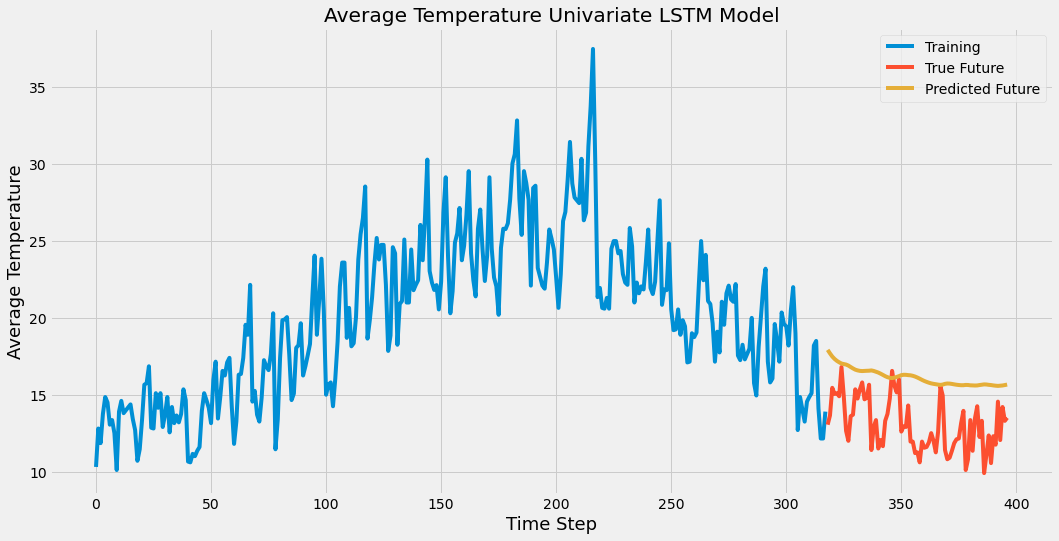

In [43]:
#Plot the data
train = temp[:training_data_len]
valid = temp[training_data_len:]
valid['Predictions'] = predictions

#Visualise
plt.figure(figsize = (16,8))
plt.title('Average Temperature Univariate LSTM Model')
plt.xlabel('Time Step', fontsize = 18)
plt.ylabel('Average Temperature', fontsize = 18)
plt.plot(train['Avg Temp'])
plt.plot(valid[['Avg Temp', 'Predictions']])
plt.legend(['Training', 'True Future', 'Predicted Future'], loc = 'upper right')
plt.show()

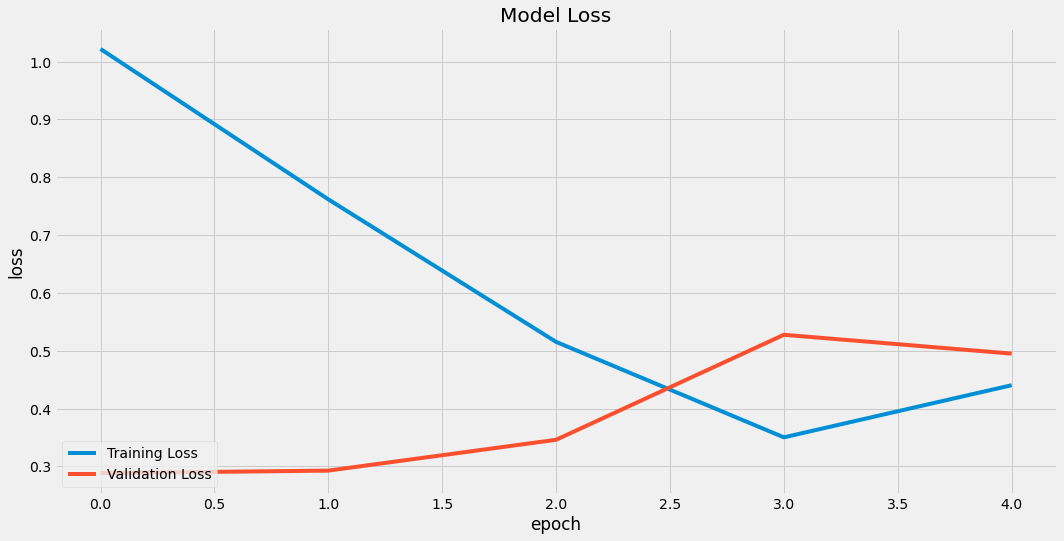

In [44]:
#Visualise loss
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

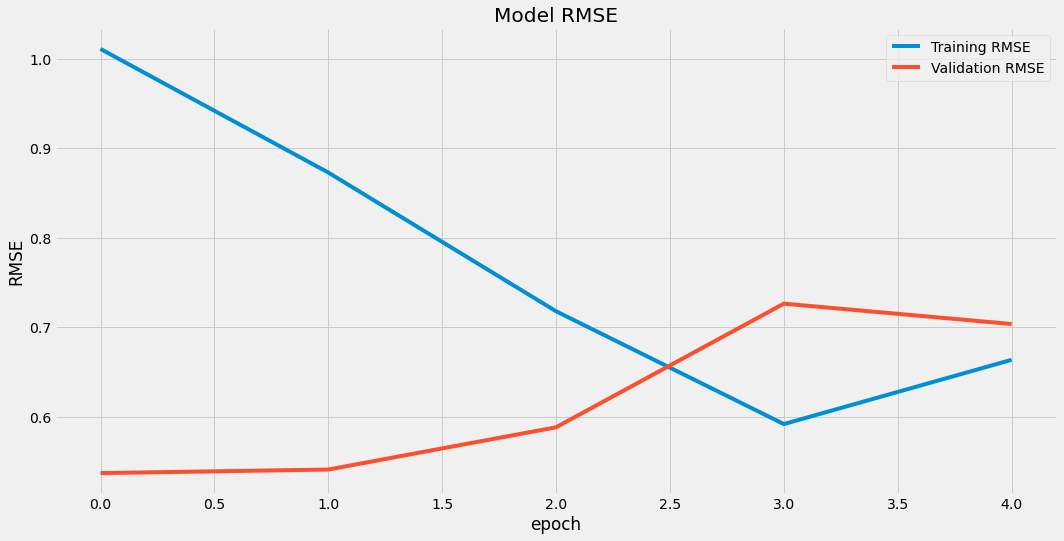

In [45]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()